##### This notebook begins the exploratory data analysis towards building a demand forecasting app using a hierarchical time series (HTS) forecasting method. 

Our first task is to build a basic time series model for one item or category of items. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv('/Users/user/hts-forecast/volume/data/raw/sales_train_evaluation.csv')

In [3]:
df1.shape

(30490, 1947)

In [4]:
df1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
df1.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.445490,1.781174,1.965267,1.389374,1.271794,1.216661,1.212299,1.395605,1.689669,1.782158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.656824,4.426550,4.706284,3.313292,3.126178,3.000348,2.955910,3.514318,4.089208,4.284356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,143.000000,156.000000,187.000000,98.000000,90.000000,77.000000,84.000000,110.000000,156.000000,117.000000


###### Lets explore the state_id, store_id, cat_id and dept_id further:

In [6]:
df1.groupby('state_id')['state_id'].agg('count')

state_id
CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

In [7]:
df1.groupby('store_id')['store_id'].agg('count')

store_id
CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: store_id, dtype: int64

In [8]:
df1.groupby('cat_id')['cat_id'].agg('count')

cat_id
FOODS        14370
HOBBIES       5650
HOUSEHOLD    10470
Name: cat_id, dtype: int64

In [9]:
df1.groupby('dept_id')['dept_id'].agg('count')

dept_id
FOODS_1        2160
FOODS_2        3980
FOODS_3        8230
HOBBIES_1      4160
HOBBIES_2      1490
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
Name: dept_id, dtype: int64

In [10]:
len(df1.item_id.unique())

3049

Lets start by only dealing with "Hobbies_1" items: 

In [11]:
df2 = df1[df1.dept_id=='HOBBIES_1']
df2.shape

(4160, 1947)

In [12]:
df2.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [13]:
len(df2.item_id.unique())

416

We can use the store_id to represent both the store and the state. Also, we don't need dept_id or cat_id as they are the same for Hobbies_1. The item_id does the job of the id so id is also unnecessary. 

In [14]:
df3 = df2.drop(['id','dept_id','cat_id','state_id'], axis='columns')
df3.head()

,item_id,store_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,CA_1,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,CA_1,0,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,CA_1,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,CA_1,0,0,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,CA_1,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


Now lets encode the item_id and store_id columns: 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4 = df3.copy()
df4.item_id = le.fit_transform(df4.item_id)
df4.store_id = le.fit_transform(df4.store_id)
df4.head()

,item_id,store_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,3,0,0,0,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [16]:
df4.groupby('item_id')['item_id'].agg('count')

item_id
0      10
1      10
2      10
3      10
4      10
       ..
411    10
412    10
413    10
414    10
415    10
Name: item_id, Length: 416, dtype: int64

In [17]:
df4.groupby('store_id')['store_id'].agg('count')

store_id
0    416
1    416
2    416
3    416
4    416
5    416
6    416
7    416
8    416
9    416
Name: store_id, dtype: int64

In [18]:
df4.shape

(4160, 1943)

##### Aggregate the items from each store into one 

We are just summing the sales per item from all 10 stores and creating a new dateframe with just item_id and dates of sale:

In [72]:
df5 = df4.groupby('item_id').sum()
df_items = df5.drop('store_id', axis = 'columns')
df_items

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
item_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,8,12,8,6,4,10,7,8,6,9
1,0,0,0,0,0,0,0,0,0,0,...,0,4,2,2,2,1,3,3,3,5
2,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,2,4,2,5,3,3
3,15,17,7,17,7,11,17,17,23,16,...,6,19,29,9,23,8,8,7,15,24
4,0,0,0,0,0,0,0,0,0,0,...,7,7,9,5,8,7,8,8,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,17,20,2,8,4,4,4,6,9,8,...,7,6,14,9,4,9,9,4,8,15
412,0,0,0,0,0,0,0,0,0,0,...,5,4,10,5,5,6,6,5,8,10
413,3,4,1,7,0,3,2,4,4,3,...,2,4,1,0,3,0,0,3,0,3


In [80]:
df_transposed = df_items.T
df_trans = df_transposed.reset_index()
df_tran = df_trans.rename(columns={'index':'d'})
df_hobbies1 = df_tran.set_index('d')
df_hobbies1

item_id,0,1,2,3,4,5,6,7,8,9,...,406,407,408,409,410,411,412,413,414,415
d,,,,,,,,,,,,,,,,,,,,,
d_1,0,0,0,15,0,0,0,71,17,5,...,10,0,82,1,0,17,0,3,0,19
d_2,0,0,0,17,0,0,0,52,10,6,...,16,0,74,0,0,20,0,4,0,7
d_3,0,0,0,7,0,0,0,56,15,5,...,4,0,16,2,0,2,0,1,0,10
d_4,0,0,0,17,0,0,0,46,15,4,...,7,0,9,1,0,8,0,7,0,8
d_5,0,0,0,7,0,0,0,60,8,3,...,10,0,19,0,0,4,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,10,1,4,8,7,6,1,54,4,3,...,4,22,15,4,1,9,6,0,7,2
d_1938,7,3,2,8,8,12,0,32,17,2,...,4,7,34,1,2,9,6,0,9,17
d_1939,8,3,5,7,8,11,2,45,11,7,...,7,17,11,6,4,4,5,3,11,8


###### We need to categorize the date columns (d_1 to d_1941) to dates of the year so that we can predict the number of days based on actual dates of the year. 

Lets look at the calender file 

In [81]:
df_cal = pd.read_csv('/Users/user/hts-forecast/volume/data/raw/calendar.csv')
df_cal

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


Lets set the calendar dataframe index to 'd' so that we can merge it with df_hobbies1 : 

In [82]:
df_d = df_cal.set_index('d')
df_d

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
d,,,,,,,,,,,,,
d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1965,2016-06-15,11620,Wednesday,5,6,2016,NaN,NaN,NaN,NaN,0,1,1
d_1966,2016-06-16,11620,Thursday,6,6,2016,NaN,NaN,NaN,NaN,0,0,0
d_1967,2016-06-17,11620,Friday,7,6,2016,NaN,NaN,NaN,NaN,0,0,0


Lets remove some unnecessary columns from the calendar dataframe before merging with df_hobbies1 : 

In [165]:
df_dates = df_d.drop(['wm_yr_wk','weekday','year','snap_CA', 'snap_TX', 'snap_WI'], axis = 'columns')
df_dates.head()

,date,wday,month,event_name_1,event_type_1,event_name_2,event_type_2
d,,,,,,,
d_1,2011-01-29,1,1,NaN,NaN,NaN,NaN
d_2,2011-01-30,2,1,NaN,NaN,NaN,NaN
d_3,2011-01-31,3,1,NaN,NaN,NaN,NaN
d_4,2011-02-01,4,2,NaN,NaN,NaN,NaN
d_5,2011-02-02,5,2,NaN,NaN,NaN,NaN


Now merge: 

In [175]:
df_merged = pd.merge(df_dates, df_hobbies1, on = 'd', how = 'right')
df_merged

,date,wday,month,event_name_1,event_type_1,event_name_2,event_type_2,0,1,2,...,406,407,408,409,410,411,412,413,414,415
d,,,,,,,,,,,,,,,,,,,,,
d_1,2011-01-29,1,1,NaN,NaN,NaN,NaN,0,0,0,...,10,0,82,1,0,17,0,3,0,19
d_2,2011-01-30,2,1,NaN,NaN,NaN,NaN,0,0,0,...,16,0,74,0,0,20,0,4,0,7
d_3,2011-01-31,3,1,NaN,NaN,NaN,NaN,0,0,0,...,4,0,16,2,0,2,0,1,0,10
d_4,2011-02-01,4,2,NaN,NaN,NaN,NaN,0,0,0,...,7,0,9,1,0,8,0,7,0,8
d_5,2011-02-02,5,2,NaN,NaN,NaN,NaN,0,0,0,...,10,0,19,0,0,4,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,2016-05-18,5,5,NaN,NaN,NaN,NaN,10,1,4,...,4,22,15,4,1,9,6,0,7,2
d_1938,2016-05-19,6,5,NaN,NaN,NaN,NaN,7,3,2,...,4,7,34,1,2,9,6,0,9,17
d_1939,2016-05-20,7,5,NaN,NaN,NaN,NaN,8,3,5,...,7,17,11,6,4,4,5,3,11,8


###### In df_merged, we now have all the "relevant information" for each sale per day for all hobbies_1 items, and now the date is the dataframe index.

Now lets explore how features such as wday and month alter the level of sales and explore this dataset further in general. 

In [176]:
df_wday = df_merged.drop(['date', 'month','event_name_1','event_type_1','event_name_2','event_type_2'], axis = 'columns')
df_wday_count = df_wday.set_index('wday')
df_wday_count

,0,1,2,3,4,5,6,7,8,9,...,406,407,408,409,410,411,412,413,414,415
wday,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,15,0,0,0,71,17,5,...,10,0,82,1,0,17,0,3,0,19
2,0,0,0,17,0,0,0,52,10,6,...,16,0,74,0,0,20,0,4,0,7
3,0,0,0,7,0,0,0,56,15,5,...,4,0,16,2,0,2,0,1,0,10
4,0,0,0,17,0,0,0,46,15,4,...,7,0,9,1,0,8,0,7,0,8
5,0,0,0,7,0,0,0,60,8,3,...,10,0,19,0,0,4,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,10,1,4,8,7,6,1,54,4,3,...,4,22,15,4,1,9,6,0,7,2
6,7,3,2,8,8,12,0,32,17,2,...,4,7,34,1,2,9,6,0,9,17
7,8,3,5,7,8,11,2,45,11,7,...,7,17,11,6,4,4,5,3,11,8


In [177]:
g1 = df_wday_count.groupby('wday')
g1.mean()

,0,1,2,3,4,5,6,7,8,9,...,406,407,408,409,410,411,412,413,414,415
wday,,,,,,,,,,,,,,,,,,,,,
1,2.615108,3.316547,1.089928,24.406475,10.187050,8.895683,1.974820,53.690647,10.043165,7.370504,...,9.370504,11.931655,32.913669,3.187050,2.395683,9.309353,4.183453,1.748201,8.917266,10.377698
2,2.525180,3.158273,0.949640,26.946043,9.028777,8.017986,1.773381,46.086331,9.723022,8.104317,...,9.021583,11.330935,26.956835,3.496403,2.676259,9.467626,4.143885,1.834532,8.402878,9.028777
3,2.126354,2.324910,0.566787,19.776173,6.570397,6.350181,1.440433,43.028881,7.422383,5.490975,...,6.808664,9.483755,26.101083,2.270758,1.754513,6.296029,3.541516,1.245487,6.635379,7.191336
4,2.101083,2.270758,0.620939,17.783394,6.321300,6.104693,1.523466,42.404332,7.787004,5.317690,...,5.714801,8.498195,26.501805,2.043321,1.610108,5.610108,3.220217,1.296029,6.487365,7.010830
5,1.971119,2.180505,0.671480,17.602888,6.711191,5.700361,1.418773,44.877256,7.032491,5.209386,...,6.205776,8.519856,25.974729,2.003610,1.725632,5.837545,3.140794,1.173285,6.288809,6.992780
6,1.819495,2.310469,0.664260,17.281588,7.115523,6.104693,1.368231,40.855596,6.866426,5.061372,...,6.296029,8.574007,26.314079,2.068592,1.844765,5.978339,2.837545,1.169675,6.736462,7.202166
7,2.212996,2.880866,0.880866,19.061372,7.696751,6.779783,1.602888,49.534296,8.400722,6.169675,...,7.407942,9.895307,27.151625,2.418773,2.018051,7.007220,3.462094,1.429603,7.223827,8.173285


<AxesSubplot:xlabel='wday'>

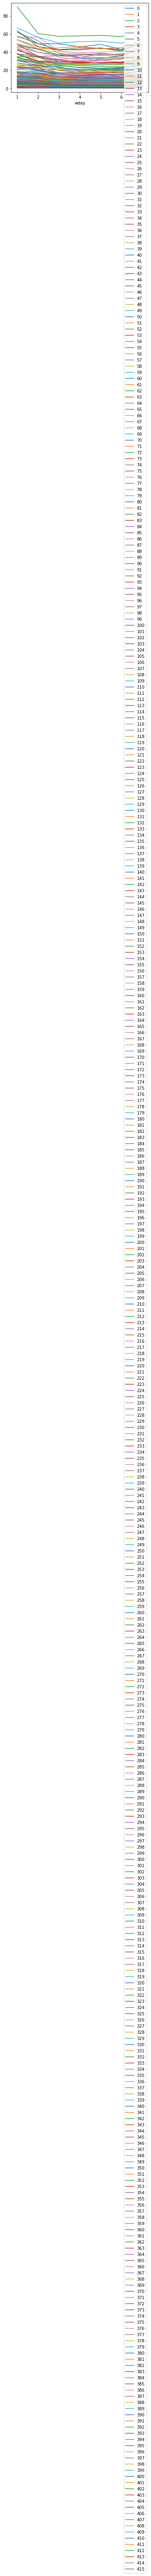

In [178]:
%matplotlib inline
g1.mean().plot()

In [181]:
df_month = df_merged.drop(['date', 'wday','event_name_1','event_type_1','event_name_2','event_type_2'], axis = 'columns')
df_monthly_count = df_month.set_index('month')
df_monthly_count

,0,1,2,3,4,5,6,7,8,9,...,406,407,408,409,410,411,412,413,414,415
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,15,0,0,0,71,17,5,...,10,0,82,1,0,17,0,3,0,19
1,0,0,0,17,0,0,0,52,10,6,...,16,0,74,0,0,20,0,4,0,7
1,0,0,0,7,0,0,0,56,15,5,...,4,0,16,2,0,2,0,1,0,10
2,0,0,0,17,0,0,0,46,15,4,...,7,0,9,1,0,8,0,7,0,8
2,0,0,0,7,0,0,0,60,8,3,...,10,0,19,0,0,4,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,10,1,4,8,7,6,1,54,4,3,...,4,22,15,4,1,9,6,0,7,2
5,7,3,2,8,8,12,0,32,17,2,...,4,7,34,1,2,9,6,0,9,17
5,8,3,5,7,8,11,2,45,11,7,...,7,17,11,6,4,4,5,3,11,8


In [182]:
g2 = df_monthly_count.groupby('month')
g2.mean()

,0,1,2,3,4,5,6,7,8,9,...,406,407,408,409,410,411,412,413,414,415
month,,,,,,,,,,,,,,,,,,,,,
1,2.373418,1.974684,0.632911,22.031646,8.784810,6.455696,1.772152,44.227848,8.506329,5.462025,...,6.784810,10.727848,25.962025,2.259494,1.253165,6.689873,3.924051,1.183544,7.120253,7.905063
2,2.164706,2.041176,0.870588,20.000000,6.417647,6.317647,1.541176,51.000000,8.664706,5.976471,...,7.664706,9.900000,29.482353,2.658824,1.700000,7.494118,3.217647,1.558824,6.835294,8.511765
3,2.258065,1.973118,0.935484,20.080645,5.451613,7.032258,1.580645,43.139785,7.731183,5.688172,...,7.080645,8.591398,30.188172,2.543011,2.139785,7.634409,3.430108,1.612903,7.311828,7.483871
4,2.077778,1.766667,1.005556,20.272222,4.838889,6.872222,1.383333,48.966667,8.827778,6.222222,...,6.600000,8.711111,31.177778,2.505556,2.211111,7.627778,3.055556,1.394444,6.800000,9.083333
5,2.022599,1.937853,0.898305,20.694915,6.502825,7.180791,1.384181,45.683616,7.711864,6.011299,...,6.474576,8.451977,35.022599,2.700565,2.559322,6.881356,2.932203,1.423729,7.271186,8.096045
6,1.453333,2.473333,0.626667,21.566667,7.846667,7.033333,1.100000,54.020000,8.593333,6.793333,...,7.506667,8.986667,30.020000,2.373333,2.440000,7.146667,3.253333,1.480000,6.886667,8.280000
7,2.122581,2.696774,0.658065,18.703226,7.716129,7.148387,1.445161,50.503226,8.064516,6.793548,...,7.645161,11.174194,25.180645,2.529032,2.509677,7.096774,3.458065,1.490323,6.825806,8.238710
8,1.877419,2.864516,0.709677,19.729032,8.225806,7.387097,1.522581,42.632258,8.432258,6.722581,...,7.432258,10.683871,26.212903,2.290323,2.322581,6.987097,3.438710,1.296774,6.935484,7.890323
9,2.206667,2.873333,0.706667,19.873333,8.273333,6.693333,1.773333,38.086667,7.640000,6.226667,...,7.413333,9.686667,20.906667,2.853333,1.980000,6.906667,3.613333,1.280000,7.333333,7.833333


<AxesSubplot:xlabel='month'>

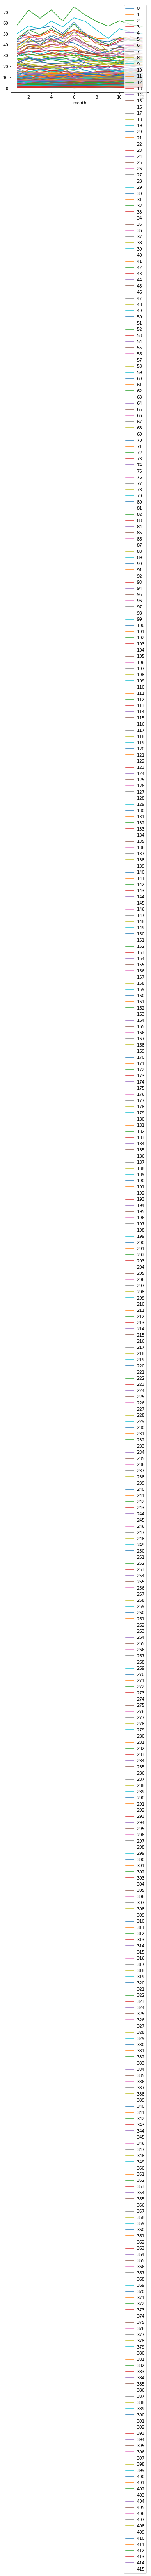

In [160]:
%matplotlib inline
g2.mean().plot()

Lets look at the events and how often they occur:

In [164]:
df_merged.groupby('event_type_1')['event_type_1'].agg('count')

event_type_1
Cultural     37
National     51
Religious    54
Sporting     16
Name: event_type_1, dtype: int64

In [163]:
df_merged.groupby('event_type_2')['event_type_2'].agg('count')

event_type_2
Cultural     3
Religious    1
Name: event_type_2, dtype: int64